In [109]:
import pandas as pd
import numpy as np
import ahrs
from ahrs.filters import Madgwick
import glob
from IPython.display import display
import os
import matplotlib.pyplot as plt

In [96]:
# df = pd.read_csv("MT_01200651-000-000_orientations.sto", skiprows=5, delimiter="\t")
# display(df)

In [97]:

# Load the sto file into a pandas dataframe
df = pd.read_csv("MT_01200651-000-000_orientations.sto", skiprows=5, delimiter="\t")
display(df)
# Split the data into separate dataframes for each sensor
time_df = df[['time']].astype(str)
torso_imu = df[['torso_imu']].astype(str)
pelvis_imu = df[['pelvis_imu']].astype(str)
hand_r_imu = df[['hand_r_imu']].astype(str)
radius_r_imu = df[['radius_r_imu']].astype(str)
humerus_r_imu = df[['humerus_r_imu']].astype(str)
calcn_r_imu = df[['calcn_r_imu']].astype(str)
tibia_r_imu = df[['tibia_r_imu']].astype(str)
femur_r_imu = df[['femur_r_imu']].astype(str)
hand_l_imu = df[['hand_l_imu']].astype(str)
radius_l_imu = df[['radius_l_imu']].astype(str)
humerus_l_imu = df[['humerus_l_imu']].astype(str)
calcn_l_imu = df[['calcn_l_imu']].astype(str)
tibia_l_imu = df[['tibia_l_imu']].astype(str)
femur_l_imu = df[['femur_l_imu']].astype(str)



In [98]:
torso_imu

,torso_imu
0,"0.6023996735069562,-0.4757237673204164,-0.4289..."
1,"0.6013394294919119,-0.4754051081922475,-0.4309..."
2,"0.6001899541126552,-0.4747896612249982,-0.4330..."
3,"0.5989585550886144,-0.4740208271401579,-0.4348..."
4,"0.597252800948768,-0.4730612847231015,-0.43716..."
...,...
2363,"0.570120089484544,-0.4007785876961091,-0.61934..."
2364,"0.5699769749572404,-0.4013672437184145,-0.6189..."
2365,"0.5700132264526071,-0.4017556209336148,-0.6183..."
2366,"0.5702802527833351,-0.4017858382544069,-0.6173..."


In [99]:
xsens_list = [torso_imu,pelvis_imu,hand_r_imu,radius_r_imu,humerus_r_imu,calcn_r_imu,
              tibia_r_imu,femur_r_imu,hand_l_imu,radius_l_imu,humerus_l_imu,calcn_l_imu,
             tibia_l_imu,femur_l_imu]

In [105]:
i = 0
for x in xsens_list:
    print("location : {}".format(i))
    display(x)
    i=i+1

location : 0


,torso_imu
0,"0.6023996735069562,-0.4757237673204164,-0.4289..."
1,"0.6013394294919119,-0.4754051081922475,-0.4309..."
2,"0.6001899541126552,-0.4747896612249982,-0.4330..."
3,"0.5989585550886144,-0.4740208271401579,-0.4348..."
4,"0.597252800948768,-0.4730612847231015,-0.43716..."
...,...
2363,"0.570120089484544,-0.4007785876961091,-0.61934..."
2364,"0.5699769749572404,-0.4013672437184145,-0.6189..."
2365,"0.5700132264526071,-0.4017556209336148,-0.6183..."
2366,"0.5702802527833351,-0.4017858382544069,-0.6173..."


location : 1


,pelvis_imu
0,"0.3371821221104603,0.6612400348624191,-0.23468..."
1,"0.3364497610224158,0.6609076817887489,-0.23449..."
2,"0.3353997650576953,0.6602420370027231,-0.23519..."
3,"0.3341579667854933,0.6595451156390385,-0.23596..."
4,"0.3321411564604383,0.6592795006235321,-0.23678..."
...,...
2363,"0.5869879030953868,0.4327653676157851,-0.53056..."
2364,"0.5876764241201503,0.4322006365377938,-0.53048..."
2365,"0.5882141754347073,0.4316305167367172,-0.53069..."
2366,"0.5884236259048865,0.4312919957579062,-0.53132..."


location : 2


,hand_r_imu
0,"0.3844292639454507,-0.1973991135975076,-0.0246..."
1,"0.386521225777629,-0.1894158322606588,-0.01329..."
2,"0.3898505310404295,-0.1789658964872773,-0.0024..."
3,"0.400581621886779,-0.1677447268344163,0.009702..."
4,"0.4109917134169132,-0.1643702493287417,0.01870..."
...,...
2363,"0.2792990132392956,-0.1785151396010655,-0.1255..."
2364,"0.278310357529409,-0.1809157254148838,-0.12267..."
2365,"0.2769454878430579,-0.1827733425013254,-0.1144..."
2366,"0.2755511137478734,-0.1816642176561557,-0.1067..."


location : 3


,radius_r_imu
0,"0.4645841580199063,-0.4859285317598849,-0.2015..."
1,"0.465710592718448,-0.4851643205699053,-0.19774..."
2,"0.4701752459003481,-0.4828515315521216,-0.1961..."
3,"0.4779484148689013,-0.4786057057774293,-0.1969..."
4,"0.4883062661420351,-0.4753040912555274,-0.1973..."
...,...
2363,"0.3928609445915096,-0.444960278956439,-0.14880..."
2364,"0.3923572343888516,-0.4452744378464252,-0.1470..."
2365,"0.3899570017856749,-0.4470974571354014,-0.1421..."
2366,"0.3882891418693014,-0.4486081491447746,-0.1398..."


location : 4


,humerus_r_imu
0,"0.1661118199085536,-0.5693938725187481,-0.1657..."
1,"0.1629997057367504,-0.5692817124197818,-0.1644..."
2,"0.1605053178678335,-0.5691777369087824,-0.1654..."
3,"0.1592936261196416,-0.5695953999767933,-0.1693..."
4,"0.1570830407251732,-0.5708025632916275,-0.1736..."
...,...
2363,"0.07165615262772104,-0.5732823010087901,-0.004..."
2364,"0.070011400949393,-0.574147182633303,-0.007293..."
2365,"0.06816522083338138,-0.5751625289358676,-0.008..."
2366,"0.06469697438041985,-0.5766688479265067,-0.006..."


location : 5


,calcn_r_imu
0,"0.8440530781547269,-0.282827532408414,-0.18854..."
1,"0.8438665098147847,-0.2880328947666392,-0.1848..."
2,"0.843983168785617,-0.2912290832350747,-0.18233..."
3,"0.8437902036911175,-0.2942773025371576,-0.1813..."
4,"0.8435110612776211,-0.2969489435174624,-0.1815..."
...,...
2363,"0.4785723597582816,-0.3304875080311374,-0.0678..."
2364,"0.4782323387476576,-0.3313589183828298,-0.0683..."
2365,"0.4779736523551552,-0.3323475498300075,-0.0687..."
2366,"0.4778019553079617,-0.3335635198299066,-0.0693..."


location : 6


,tibia_r_imu
0,"0.5841629068180558,-0.002596132528242056,-0.78..."
1,"0.5836594743321026,-0.008427091127430598,-0.78..."
2,"0.5829723630607999,-0.01341547989179302,-0.789..."
3,"0.5836584355907567,-0.01626704465850249,-0.789..."
4,"0.5849746678298698,-0.0200363697161134,-0.7901..."
...,...
2363,"0.5126284603685566,-0.4747661685419478,-0.6799..."
2364,"0.512348395931853,-0.4749684035269839,-0.68010..."
2365,"0.5123166440268609,-0.4749810973098082,-0.6802..."
2366,"0.5126257509399833,-0.4745191749677417,-0.6806..."


location : 7


,femur_r_imu
0,"0.3191692958397765,-0.5966077189735111,-0.2420..."
1,"0.3138447277634271,-0.597088898469896,-0.23350..."
2,"0.3074768153196623,-0.5979874373174279,-0.2268..."
3,"0.3048132083422215,-0.5986540082830466,-0.2211..."
4,"0.3023874116458283,-0.5990293183570828,-0.2152..."
...,...
2363,"0.100813927091942,-0.7177082871698783,-0.16593..."
2364,"0.09967182570535096,-0.7170959342850419,-0.167..."
2365,"0.09898612734786555,-0.7164313195657797,-0.168..."
2366,"0.09829917434210875,-0.7160285176228248,-0.169..."


location : 8


,hand_l_imu
0,"0.7642609128096406,0.1448474556125838,-0.44293..."
1,"0.7637158051288279,0.1474216781690137,-0.44117..."
2,"0.7624620336582868,0.1508668828834027,-0.43910..."
3,"0.7606715872389512,0.1536629009349369,-0.43824..."
4,"0.7586058355791611,0.156087334909055,-0.439094..."
...,...
2363,"0.7765266161210763,-0.07574950700159437,-0.603..."
2364,"0.7778506618269752,-0.07320655121821831,-0.602..."
2365,"0.7788715578297892,-0.07007765372549277,-0.601..."
2366,"0.7794667118553433,-0.06674757008953951,-0.601..."


location : 9


,radius_l_imu
0,"0.8219407912306614,-0.09354018083299263,-0.561..."
1,"0.8220014260785825,-0.09243108357398228,-0.561..."
2,"0.8216838586072925,-0.09120023694286042,-0.562..."
3,"0.8211736360132471,-0.08927407317723646,-0.563..."
4,"0.8204276673050648,-0.08666822059336761,-0.564..."
...,...
2363,"0.6719979776995257,-0.3327990161952392,-0.5590..."
2364,"0.6729198925731784,-0.3308188565133504,-0.5585..."
2365,"0.6738462979914253,-0.3282713275384231,-0.5585..."
2366,"0.6744153925020693,-0.3258167165373597,-0.5587..."


location : 10


,humerus_l_imu
0,"0.8053200426849878,0.02938054940278797,-0.5000..."
1,"0.8046031152929588,0.02939896296947499,-0.5002..."
2,"0.8037606889214989,0.02867457956239462,-0.5016..."
3,"0.8026690306432009,0.02996627725484891,-0.5028..."
4,"0.8012660222401564,0.0321098097521653,-0.50393..."
...,...
2363,"0.7945996664402524,-0.252763083450609,-0.54137..."
2364,"0.7944891463714279,-0.2527964064647322,-0.5412..."
2365,"0.7945563786028127,-0.2515909560776353,-0.5415..."
2366,"0.7943439601588357,-0.2504985677177535,-0.5422..."


location : 11


,calcn_l_imu
0,"0.8886866713591327,0.07291096184520311,-0.1621..."
1,"0.8879380253637525,0.07151174192709545,-0.1681..."
2,"0.8877135960722038,0.06942272225291848,-0.1777..."
3,"0.8877278620053699,0.06620272161766157,-0.1883..."
4,"0.888396073066904,0.0604764105273258,-0.198287..."
...,...
2363,"0.9225135884338335,0.08158417090970677,-0.3063..."
2364,"0.9226067702467085,0.08101989128043902,-0.3062..."
2365,"0.9227085865188676,0.08033659043850677,-0.3062..."
2366,"0.9228064861205012,0.07961420552706693,-0.3062..."


location : 12


,tibia_l_imu
0,"0.4443880928916776,-0.4904992309034041,-0.6613..."
1,"0.4391742960468626,-0.4898745772515499,-0.6655..."
2,"0.4302714250577181,-0.4941428828704428,-0.6687..."
3,"0.4232951147736536,-0.4982974026050782,-0.6707..."
4,"0.4166583302677279,-0.5041019641193153,-0.6714..."
...,...
2363,"0.02623615718559553,-0.7226188776105597,-0.161..."
2364,"0.02546620325144753,-0.7228796697300323,-0.162..."
2365,"0.02487945413873791,-0.7231769969152188,-0.162..."
2366,"0.02501670326568226,-0.7234268260671938,-0.163..."


location : 13


,femur_l_imu
0,"0.4833494147579677,0.4060534057216031,-0.22763..."
1,"0.4851054356895214,0.4064556823929589,-0.22436..."
2,"0.4876041418222128,0.4054644682826554,-0.22261..."
3,"0.4899948544679936,0.4031513451444728,-0.22245..."
4,"0.4918792173590937,0.3988671342202214,-0.22327..."
...,...
2363,"0.6770993834830137,0.05694310860167783,-0.7287..."
2364,"0.6765982391226872,0.05656358110660215,-0.7290..."
2365,"0.6765612319139926,0.05510871858383247,-0.7292..."
2366,"0.6767010940803059,0.05380075004494516,-0.7291..."


In [115]:
a_list=[]
for x in xsens_list:
    a=x.iloc[:,0].str.split(',', expand=True)
    a.columns = ['q1', 'q2', 'q3', 'q4']
    a.astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
    a_list.append(a)

In [128]:
torso_dataframe = a_list[0].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
pelvis_dataframe = a_list[1].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
hand_r_dataframe = a_list[2].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
radius_r_dataframe = a_list[3].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
humerus_r_dataframe = a_list[4].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
calcn_r_dataframe = a_list[5].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
tibia_r_dataframe = a_list[6].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
femur_r_dataframe =  a_list[7].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
hand_l_dataframe = a_list[8].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
radius_l_dataframe = a_list[9].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
humerus_l_dataframe = a_list[10].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
calcn_l_dataframe = a_list[11].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
tibia_l_dataframe = a_list[12].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
femur_l_dataframe =  a_list[13].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
time_df = time_df.astype({'time':'float'})

In [122]:
type(torso_dataframe.iloc[1,2])

numpy.float64

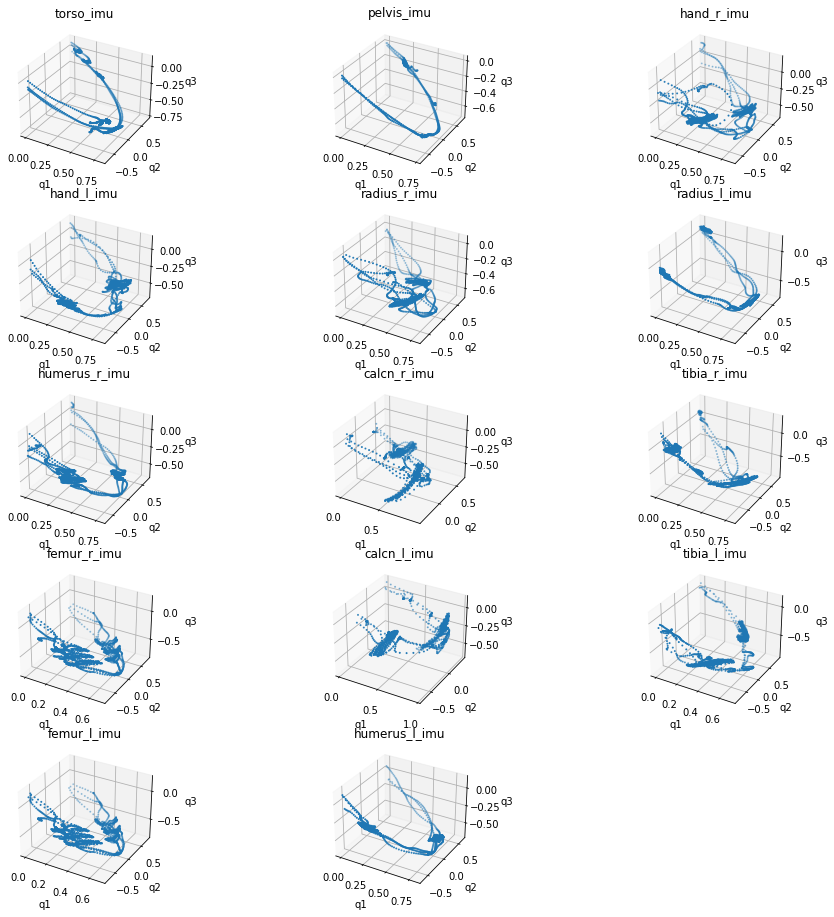

In [123]:
sample_time = 0.01  # replace with your assumed sample time in seconds





sensors_data = {
    'torso_imu': torso_dataframe,
    'pelvis_imu': pelvis_dataframe,
    'hand_r_imu': hand_r_dataframe,
    'hand_l_imu': hand_l_dataframe,
    'radius_r_imu': radius_r_dataframe,
    'radius_l_imu': radius_l_dataframe,
    'humerus_r_imu': humerus_r_dataframe,
    'calcn_r_imu': calcn_r_dataframe,
    'tibia_r_imu': tibia_r_dataframe,
    'femur_r_imu': femur_r_dataframe,
    'calcn_l_imu': calcn_l_dataframe,
    'tibia_l_imu': tibia_l_dataframe,
    'femur_l_imu': femur_r_dataframe,
    'humerus_l_imu': humerus_l_dataframe,
}



fig = plt.figure(figsize=(16, 16))
for i, (key, df) in enumerate(sensors_data.items()):
    ax = fig.add_subplot(5, 3, i+1, projection='3d')
    quats = df[['q1', 'q2', 'q3', 'q4']].to_numpy()
    ax.scatter(quats[:, 0], quats[:, 1], quats[:, 2], s=1)
    ax.set_title(key)
    ax.set_xlabel('q1')
    ax.set_ylabel('q2')
    ax.set_zlabel('q3')
plt.show()


In [89]:
# print the new dataframe
display(torso_dataframe)

,q1,q2,q3,q4
0,0.6023996735069562,-0.4757237673204164,-0.4289035077716279,-0.4762807067123084
1,0.6013394294919119,-0.4754051081922475,-0.4309884164284523,-0.4760565707429679
2,0.6001899541126552,-0.4747896612249982,-0.4330587083682446,-0.47624253451632
3,0.5989585550886144,-0.4740208271401579,-0.4348478219505058,-0.476927957314751
4,0.597252800948768,-0.4730612847231015,-0.4371686200899988,-0.4778971754086713
...,...,...,...,...
2363,0.570120089484544,-0.4007785876961091,-0.6193476973556132,-0.3615909802397558
2364,0.5699769749572404,-0.4013672437184145,-0.6189262588348093,-0.3618851610845944
2365,0.5700132264526071,-0.4017556209336148,-0.6183360567987596,-0.3624056616278172
2366,0.5702802527833351,-0.4017858382544069,-0.6173782195158798,-0.36358315077982


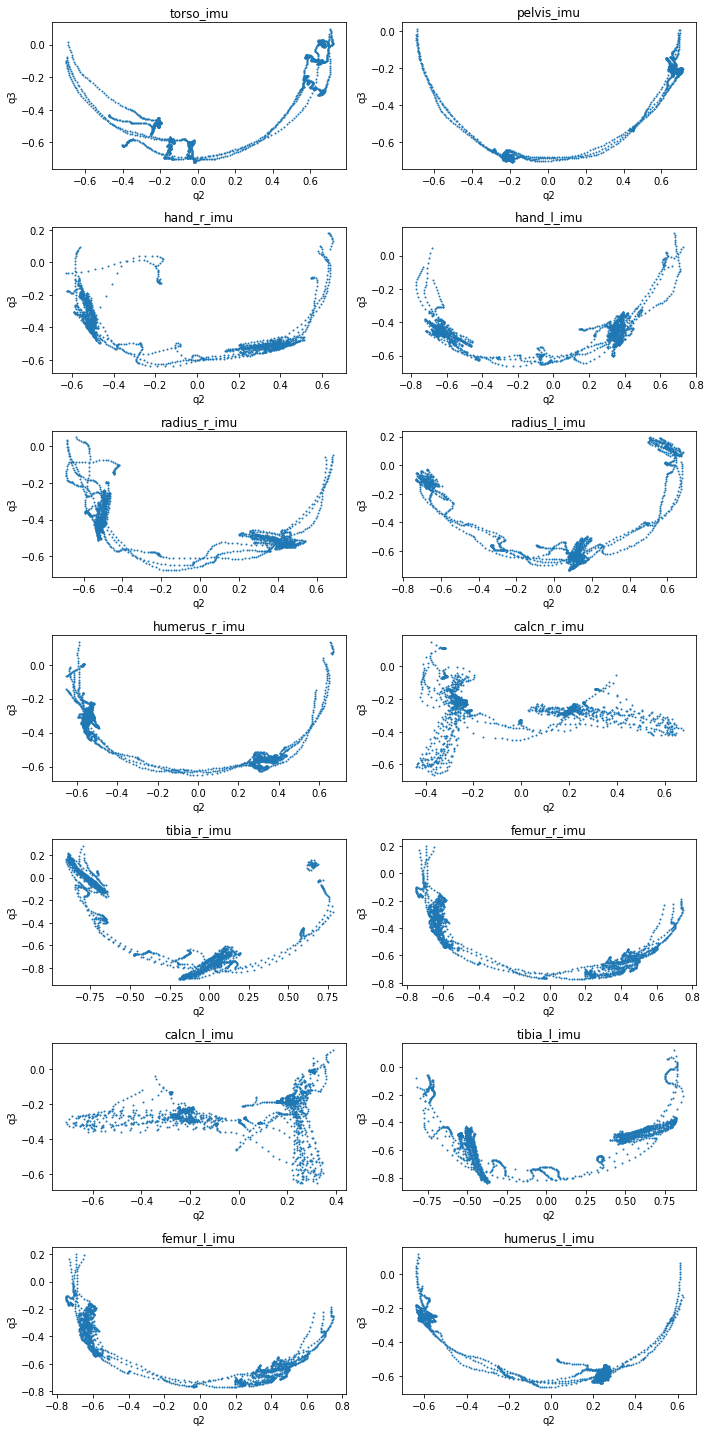

In [134]:
# Plot the quaternions in 2D
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
axs = axs.flatten()
for i, (key, quats) in enumerate(sensors_data.items()):
    axs[i].scatter(quats['q2'], quats['q3'], s=1)
    axs[i].set_title(key)
    axs[i].set_xlabel('q2')
    axs[i].set_ylabel('q3')
plt.tight_layout()
plt.show()

In [126]:
time_df

,time
0,0.0
1,0.025
2,0.05
3,0.075
4,0.1
...,...
2363,59.07499999999771
2364,59.09999999999771
2365,59.12499999999771
2366,59.14999999999771


In [131]:
time_df.to_csv('sample_time.csv')

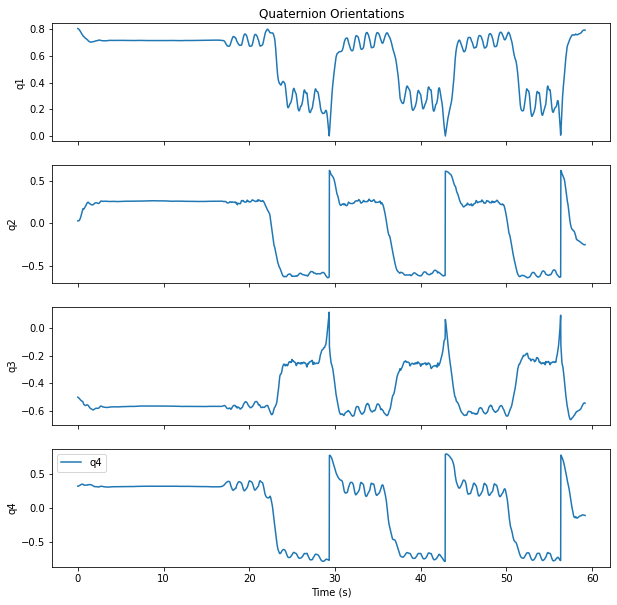

In [132]:
t = time_df.time 

# Create a figure with subplots for each quaternion
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 10))
axs[0].set_title('Quaternion Orientations')

# Plot each quaternion
for i, col in enumerate(df.columns):
    axs[i].plot(t, df[col], label=col)
    axs[i].set_ylabel(col)

# Add a legend and x-axis label
axs[-1].set_xlabel('Time (s)')
plt.legend()

# Show the plot
plt.show()

ValueError: If using all scalar values, you must pass an index

In [22]:
df

,time,torso_imu,pelvis_imu,hand_r_imu,radius_r_imu,humerus_r_imu,calcn_r_imu,tibia_r_imu,femur_r_imu,hand_l_imu,radius_l_imu,humerus_l_imu,calcn_l_imu,tibia_l_imu,femur_l_imu
0,0.000,"0.6023996735069562,-0.4757237673204164,-0.4289...","0.3371821221104603,0.6612400348624191,-0.23468...","0.3844292639454507,-0.1973991135975076,-0.0246...","0.4645841580199063,-0.4859285317598849,-0.2015...","0.1661118199085536,-0.5693938725187481,-0.1657...","0.8440530781547269,-0.282827532408414,-0.18854...","0.5841629068180558,-0.002596132528242056,-0.78...","0.3191692958397765,-0.5966077189735111,-0.2420...","0.7642609128096406,0.1448474556125838,-0.44293...","0.8219407912306614,-0.09354018083299263,-0.561...","0.8053200426849878,0.02938054940278797,-0.5000...","0.8886866713591327,0.07291096184520311,-0.1621...","0.4443880928916776,-0.4904992309034041,-0.6613...","0.4833494147579677,0.4060534057216031,-0.22763..."
1,0.025,"0.6013394294919119,-0.4754051081922475,-0.4309...","0.3364497610224158,0.6609076817887489,-0.23449...","0.386521225777629,-0.1894158322606588,-0.01329...","0.465710592718448,-0.4851643205699053,-0.19774...","0.1629997057367504,-0.5692817124197818,-0.1644...","0.8438665098147847,-0.2880328947666392,-0.1848...","0.5836594743321026,-0.008427091127430598,-0.78...","0.3138447277634271,-0.597088898469896,-0.23350...","0.7637158051288279,0.1474216781690137,-0.44117...","0.8220014260785825,-0.09243108357398228,-0.561...","0.8046031152929588,0.02939896296947499,-0.5002...","0.8879380253637525,0.07151174192709545,-0.1681...","0.4391742960468626,-0.4898745772515499,-0.6655...","0.4851054356895214,0.4064556823929589,-0.22436..."
2,0.050,"0.6001899541126552,-0.4747896612249982,-0.4330...","0.3353997650576953,0.6602420370027231,-0.23519...","0.3898505310404295,-0.1789658964872773,-0.0024...","0.4701752459003481,-0.4828515315521216,-0.1961...","0.1605053178678335,-0.5691777369087824,-0.1654...","0.843983168785617,-0.2912290832350747,-0.18233...","0.5829723630607999,-0.01341547989179302,-0.789...","0.3074768153196623,-0.5979874373174279,-0.2268...","0.7624620336582868,0.1508668828834027,-0.43910...","0.8216838586072925,-0.09120023694286042,-0.562...","0.8037606889214989,0.02867457956239462,-0.5016...","0.8877135960722038,0.06942272225291848,-0.1777...","0.4302714250577181,-0.4941428828704428,-0.6687...","0.4876041418222128,0.4054644682826554,-0.22261..."
3,0.075,"0.5989585550886144,-0.4740208271401579,-0.4348...","0.3341579667854933,0.6595451156390385,-0.23596...","0.400581621886779,-0.1677447268344163,0.009702...","0.4779484148689013,-0.4786057057774293,-0.1969...","0.1592936261196416,-0.5695953999767933,-0.1693...","0.8437902036911175,-0.2942773025371576,-0.1813...","0.5836584355907567,-0.01626704465850249,-0.789...","0.3048132083422215,-0.5986540082830466,-0.2211...","0.7606715872389512,0.1536629009349369,-0.43824...","0.8211736360132471,-0.08927407317723646,-0.563...","0.8026690306432009,0.02996627725484891,-0.5028...","0.8877278620053699,0.06620272161766157,-0.1883...","0.4232951147736536,-0.4982974026050782,-0.6707...","0.4899948544679936,0.4031513451444728,-0.22245..."
4,0.100,"0.597252800948768,-0.4730612847231015,-0.43716...","0.3321411564604383,0.6592795006235321,-0.23678...","0.4109917134169132,-0.1643702493287417,0.01870...","0.4883062661420351,-0.4753040912555274,-0.1973...","0.1570830407251732,-0.5708025632916275,-0.1736...","0.8435110612776211,-0.2969489435174624,-0.1815...","0.5849746678298698,-0.0200363697161134,-0.7901...","0.3023874116458283,-0.5990293183570828,-0.2152...","0.7586058355791611,0.156087334909055,-0.439094...","0.8204276673050648,-0.08666822059336761,-0.564...","0.8012660222401564,0.0321098097521653,-0.50393...","0.888396073066904,0.0604764105273258,-0.198287...","0.4166583302677279,-0.5041019641193153,-0.6714...","0.4918792173590937,0.3988671342202214,-0.22327..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,59.075,"0.570120089484544,-0.4007785876961091,-0.61934...","0.58698790309538